#  Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

from sklearn.model_selection import train_test_split

In [2]:
# Import custom class
%run -i '../src/helper/transfxn.py'

In [3]:
# Instantiate the class
transfxn = TransformationPipeline()

# Load data

In [4]:
df = pd.read_csv('../data/feat_engr_data.csv') # Load cleaned data
df = df.sample(frac =1).reset_index(drop = True) # shuffle
print('Data size',df.shape) # data size
df.head()

Data size (3817613, 37)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,avg_hr_per_day,p_isev_ct,traf_ct,avg_p_isev_per_day,avg_p_isev_per_hour,avg_traf_per_day,c_conf_ind,c_rcfg_ind,c_wthr_ind,v_type_ind
0,1999,August,Wednesday,12.0,0,3.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,0.456929,1641640,1184092,3.087612,6.757305,2.227051,N,N,N,N
1,1999,March,Tuesday,15.0,0,1.0,Hit a moving object,Non-intersection,Clear and sunny,"Dry, normal",...,0.615204,2151965,2048382,4.056951,6.594485,3.861673,N,N,N,N
2,2013,July,Wednesday,17.0,0,2.0,Rear-end collision,At an intersection,Clear and sunny,"Dry, normal",...,0.627718,2151965,1184092,4.047436,6.447855,2.227051,N,N,N,N
3,2012,December,Thursday,9.0,0,1.0,Any other single-vehicle,Non-intersection,Clear and sunny,Icy,...,0.275892,2151965,2048382,3.818838,13.841763,3.635022,N,N,N,N
4,2011,November,Saturday,18.0,0,2.0,Any other two-vehicle - different direction,At an intersection,Clear and sunny,"Dry, normal",...,0.442173,1641640,2048382,2.880889,6.515298,3.594674,N,N,N,N


In [5]:
X1, X2, y1, y2 = train_test_split(df, df['class'], test_size = 0.003, random_state = 42, stratify = df['class'])

# Create feature matrix & class label

In [6]:
# Feature matrix and class label
cols_to_drop = ['c_case','c_traf','p_id', 'v_id', 'class']
X, y = X2.drop(cols_to_drop, axis = 1), X2['class']

In [7]:
# Re-encode the class variable
y.replace({0:'Non-fatal', 1: 'Fatal'}, inplace=True)

# Transformation pipeline

In [8]:
# Transform and scale data
X_scaled, _,_ = transfxn.preprocessing(X, X)

In [9]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (11453, 128)


# PCA plot

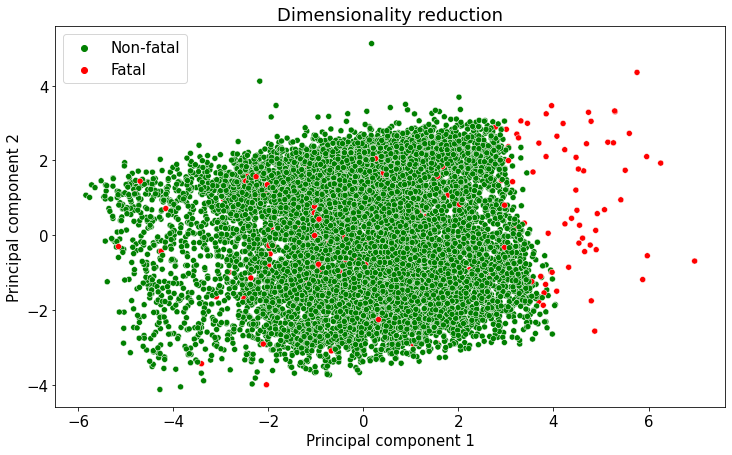

In [10]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])